#### DIAGNOSES_ICD TABLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# reading gzip file
file = 'C:/Users/aneja/Documents/Docs/Winter_2024/HealthCare Analytics/Project/New folder/DIAGNOSES_ICD.csv.gz'
diagnoses_df = pd.read_csv(file, compression='gzip')
diagnoses_df

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [3]:
diagnoses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [4]:
diagnoses_df.isnull().sum()

ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
SEQ_NUM       47
ICD9_CODE     47
dtype: int64

##### According to the description provided, SEQ_NUM provides the order in which the ICD diagnoses relate to the patient. ICD diagnoses are ordered by priority - and the order does have an impact on the reimbursement for treatment. and  ICD9_CODE contains the actual code corresponding to the diagnosis assigned to the patient for the given row. Note that all codes, as of MIMIC-III v1.0, are ICD-9 codes. These two are quite important columns and we can't replace or delete these missing values. 

In [5]:
diagnoses_df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM
count,651047.00000,651047.000000,651047.000000,651000.000000
mean,325524.00000,38971.159758,150017.744819,7.913836
std,187941.22469,29372.198841,28878.068648,6.072633
min,1.00000,2.000000,100001.000000,1.000000
25%,162762.50000,14562.500000,125028.000000,3.000000
50%,325524.00000,28671.000000,150140.000000,6.000000
75%,488285.50000,63715.000000,174978.000000,11.000000
max,651047.00000,99999.000000,199999.000000,39.000000


In [6]:
diagnoses_df.nunique()

ROW_ID        651047
SUBJECT_ID     46520
HADM_ID        58976
SEQ_NUM           39
ICD9_CODE       6984
dtype: int64

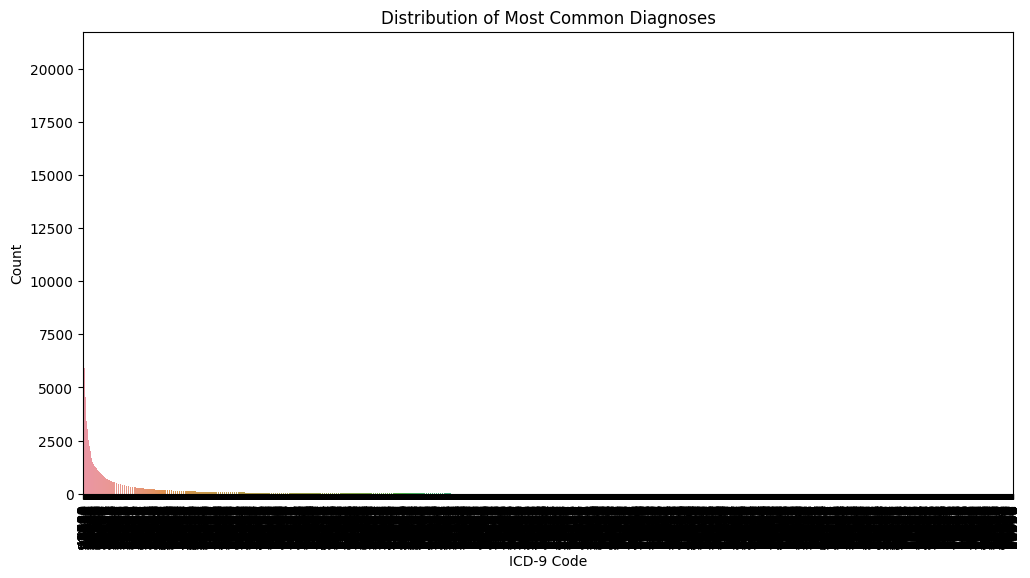

In [7]:
# Explore the distribution of ICD-9 codes
plt.figure(figsize=(12, 6))
sns.countplot(x='ICD9_CODE', data=diagnoses_df, order=diagnoses_df['ICD9_CODE'].value_counts().index)
plt.title('Distribution of Most Common Diagnoses')
plt.xlabel('ICD-9 Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


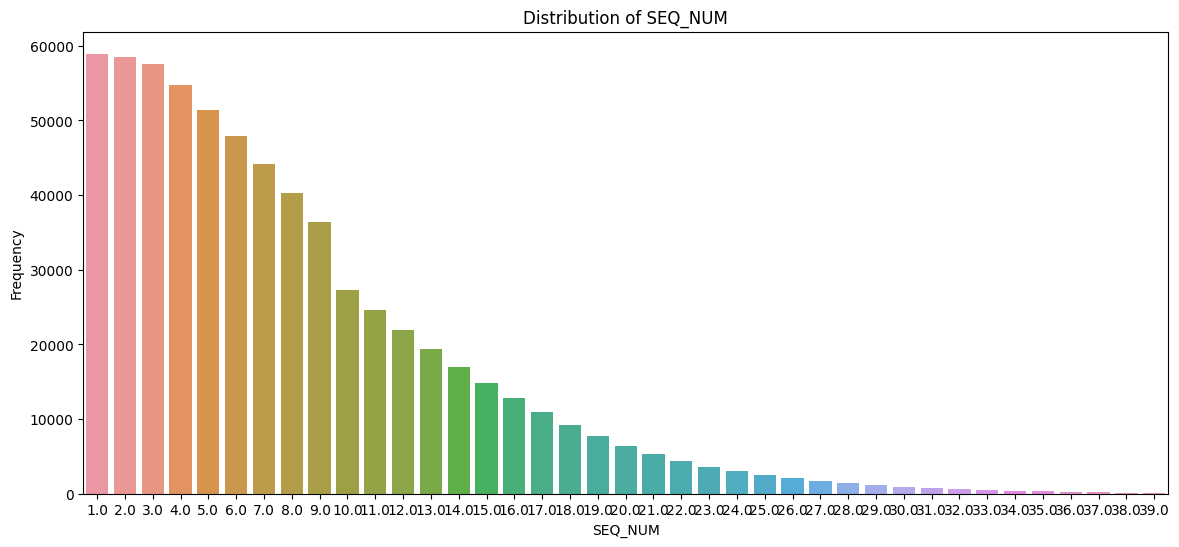

In [8]:
# SEQ_NUM Analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=diagnoses_df, x='SEQ_NUM')
plt.title('Distribution of SEQ_NUM')
plt.xlabel('SEQ_NUM')
plt.ylabel('Frequency')
plt.show()

### References:
https://physionet.org/content/mimiciii/1.4/

https://mimic.mit.edu/docs/iii/tables/

https://www.aapc.com/codes/icd9-codes-vol3-range

https://mit-lcp.github.io/mimic-schema-spy/index.html

In [11]:
#save clean data into csv file

csv_path = 'DIAGNOSES_ICD_table_clean.csv'
diagnoses_df.to_csv(csv_path,
                   index = False)